<a href="https://colab.research.google.com/github/icarusrodrigues/queue-simulations/blob/main/MM1_Queue_Priority_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **M/M/1 Queue With Priority**

An M/M/1 queue with priority is a queue model similar to the M/M/1 queue, the difference is that in this new model we have 2 types of customers, one of which has priority, therefore, customers of that type need to be served first, regardless of the number of people in the queue.

In [23]:
!pip install simpy

In [24]:
import numpy as np
import simpy as sp
import matplotlib.pyplot as plt
import random as rd

In [25]:
class MM1QueuePriority:

  def __init__(self, arrival_rate, service_rate, priority_rate, horizon, show=False):
    self.env = sp.Environment()
    self.n = 0
    self.normal_queue = 0
    self.priority_queue = 0
    self.arrival_rate = arrival_rate
    self.service_rate = service_rate
    self.priority_rate = priority_rate
    self.horizon = horizon
    self.show = show
    self.times_queue_normal = []
    self.people_queue_normal = []
    self.times_queue_priority = []
    self.people_queue_priority = []

  def arrive(self):
    while True:
      yield self.env.timeout(np.random.exponential(1/self.arrival_rate))
      self.n += 1

      if np.random.random() < self.priority_rate:
        self.priority_queue += 1
        self.people_queue_priority.append(self.priority_queue)
        self.times_queue_priority.append(self.env.now)

        if self.show:
          print(f"Priority customer has arrived!\n- n = {self.n},  normal queue = {self.normal_queue}, priority queue = {self.priority_queue}, t = {self.env.now})\n")
      else:
        self.normal_queue += 1
        self.people_queue_normal.append(self.normal_queue)
        self.times_queue_normal.append(self.env.now)

        if self.show:
          print(f"Normal customer has arrived!\n- n = {self.n},  normal queue = {self.normal_queue}, priority queue = {self.priority_queue}, t = {self.env.now})\n")

      if self.n == 1:
        self.env.process(self.service())

  def service(self):
    while self.n > 0:

      yield self.env.timeout(np.random.exponential(1/self.service_rate))

      self.n -= 1

      if self.priority_queue > 0:
        self.priority_queue -= 1
        self.people_queue_priority.append(self.priority_queue)
        self.times_queue_priority.append(self.env.now)

        if self.show:
          print(f"Priority customer served!\n- n = {self.n}, normal queue = {self.normal_queue}, priority queue = {self.priority_queue}, t = {self.env.now})\n")

      else:
        self.normal_queue -= 1
        self.people_queue_normal.append(self.normal_queue)
        self.times_queue_normal.append(self.env.now)

        if self.show:
          print(f"Normal customer served!\n- n = {self.n}, normal queue = {self.normal_queue}, priority queue = {self.priority_queue}, t = {self.env.now})\n")

  def run_simulation(self):
    self.env.process(self.arrive())

    if self.n > 0:
      self.env.process(self.service())

    self.env.run(until=self.horizon)

    print("End of simulation!")

Example of simulation using an arrival rate of 7 people per minute, a service rate of 5 people per minute, in a period (horizon) of 30 minutes, with 20% of customers having priority. You can see the size of the queue when someone arrives or leaves.

In [26]:
arrival_rate = 7
service_rate = 5
priority_rate = 0.2
horizon = 30

mm1_queue_priority = MM1QueuePriority(arrival_rate, service_rate, priority_rate, horizon, True)

mm1_queue_priority.run_simulation()

Normal customer has arrived!
- n = 1,  normal queue = 1, priority queue = 0, t = 0.016090767887748617)

Normal customer served!
- n = 0, normal queue = 0, priority queue = 0, t = 0.07235748117882056)

Normal customer has arrived!
- n = 1,  normal queue = 1, priority queue = 0, t = 0.12136510339958535)

Normal customer served!
- n = 0, normal queue = 0, priority queue = 0, t = 0.1279148652584132)

Normal customer has arrived!
- n = 1,  normal queue = 1, priority queue = 0, t = 0.24696331406881034)

Normal customer has arrived!
- n = 2,  normal queue = 2, priority queue = 0, t = 0.27023228948206035)

Priority customer has arrived!
- n = 3,  normal queue = 2, priority queue = 1, t = 0.32037691105446836)

Priority customer served!
- n = 2, normal queue = 2, priority queue = 0, t = 0.39165414297679024)

Normal customer has arrived!
- n = 3,  normal queue = 3, priority queue = 0, t = 0.5698347508853052)

Normal customer has arrived!
- n = 4,  normal queue = 4, priority queue = 0, t = 0.70886

Below there is a graph showing how the normal queue behaves over time.

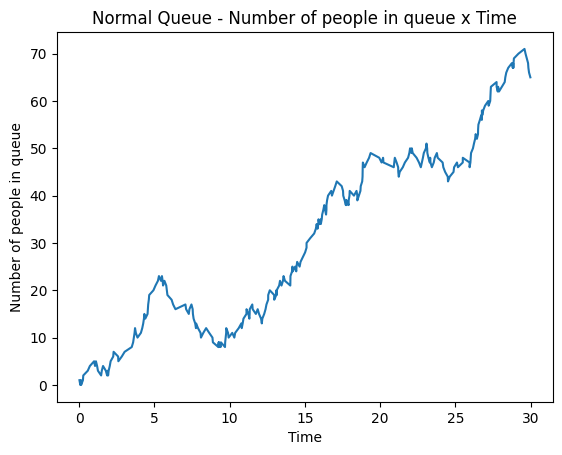

In [27]:
plt.plot(mm1_queue_priority.times_queue_normal, mm1_queue_priority.people_queue_normal)
plt.title("Normal Queue - Number of people in queue x Time")
plt.xlabel("Time")
plt.ylabel("Number of people in queue")
plt.show()

Below there is a graph showing how the priority queue behaves over time.

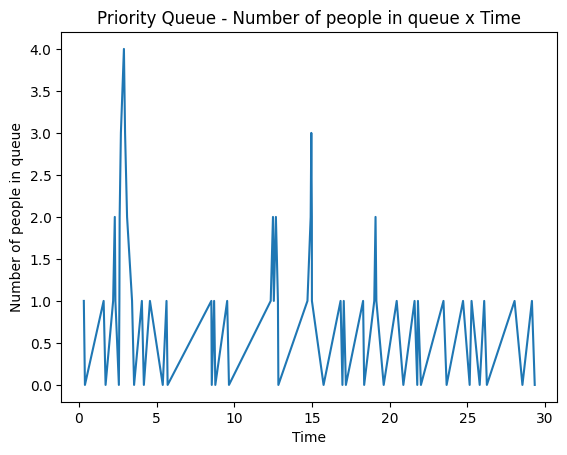

In [28]:
plt.plot(mm1_queue_priority.times_queue_priority, mm1_queue_priority.people_queue_priority)
plt.title("Priority Queue - Number of people in queue x Time")
plt.xlabel("Time")
plt.ylabel("Number of people in queue")
plt.show()